# Multi-class Classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multicalss_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [13]:
classes =4
m=100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

X_train: (100, 2), y_train: (100,)


/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


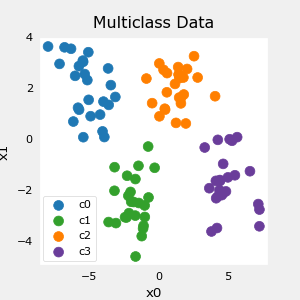

In [14]:
plt_mc(X_train, y_train, classes, centers, std)

In [15]:
print(f"unique classes {np.unique(y_train)}")

unique classes [0 1 2 3]


In [16]:
print(f"class representation {y_train[-10:]}")

class representation [3 0 2 1 2 1 1 2 2 0]


In [17]:
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

shape of X_train: (100, 2), shape of y_train: (100,)


In [22]:
tf.random.set_seed(1234)
model = Sequential([
    Dense(2, activation='relu', name="l1"),
    Dense(4, activation="linear", name="l2")
])

In [23]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)
model.fit(
    X_train, y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0587  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 1.8700
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 1.7258
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 1.6056
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 1.5029
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 1.4164
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 1.3438
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 1.2823
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 1.2288
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 1.1833
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 1.1456
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 1.1134
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 1.0863
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 1.0633
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 1.0441
Epoc

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step


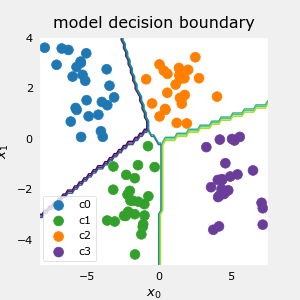

In [24]:
plt_cat_mc(X_train, y_train, model, classes)

In [25]:
l1=model.get_layer("l1")
W1, b1 = l1.get_weights()
print(W1, b1)

[[-1.37  0.47]
 [-0.7  -2.28]] [0.45 1.76]


/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


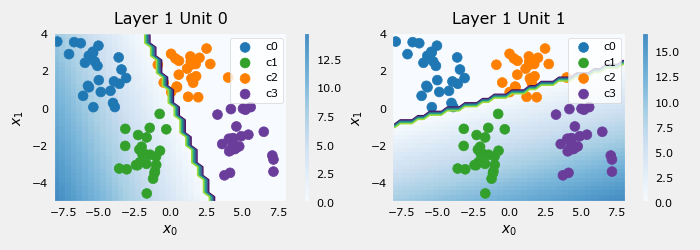

In [26]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1,classes)

In [27]:
l2=model.get_layer("l2")

In [29]:
W2, b2= l2.get_weights()
Xl2 = np.zeros_like(X_train)
print(Xl2.shape)

(100, 2)


In [30]:
Xl2=np.maximum(0, np.dot(X_train, W1) +b1)

/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/haoyiwen/Documents/ai/2022-Machine-Learning-Specializatio/practise/Advanced Learning Algorithms/week2/lab_utils_multicalss_TF.py:71: UserWarn

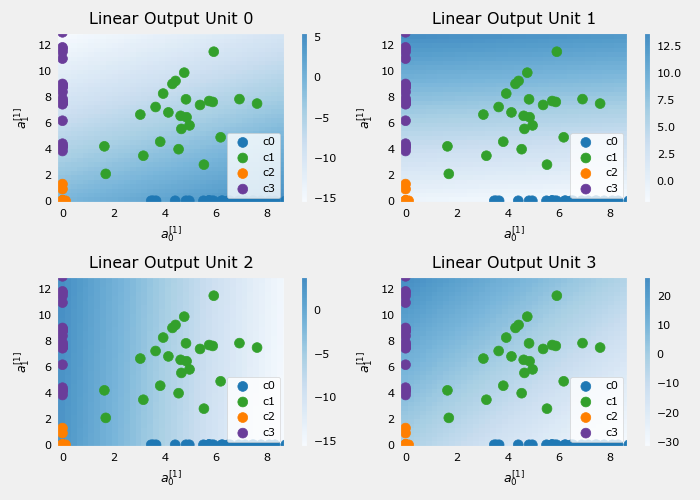

In [32]:
plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2,b2,classes,x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))